<a href="https://colab.research.google.com/github/mswiseman/miteVision/blob/main/miteVision_yolov8_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Spotted Spider Mite YOLO CV Model Development

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)


**Template by RoboFlow**

---


Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.


## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.



## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Thu May 11 20:27:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    43W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from IPython.core.display import mimetypes
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/blackbird/mite_detection

/content/drive/MyDrive/blackbird/mite_detection


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/blackbird/mite_detection


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. 

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 24.1/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8uUeHQYjIczP4UfH83mI")
project = rf.workspace("gent-lab").project("tssm-detection")
dataset = project.version(2).download("yolov8")


| Model Type  | Pre-trained Weights                                                                                              | Task                  |
|-------------|------------------------------------------------------------------------------------------------------------------|-----------------------|
| YOLOv8      | `yolov8n.pt`, `yolov8s.pt`, `yolov8m.pt`, `yolov8l.pt`, `yolov8x.pt`                                             | Detection             |
| YOLOv8-seg  | `yolov8n-seg.pt`, `yolov8s-seg.pt`, `yolov8m-seg.pt`, `yolov8l-seg.pt`, `yolov8x-seg.pt`                         | Instance Segmentation |
| YOLOv8-pose | `yolov8n-pose.pt`, `yolov8s-pose.pt`, `yolov8m-pose.pt`, `yolov8l-pose.pt`, `yolov8x-pose.pt` ,`yolov8x-pose-p6` | Pose/Keypoints        |
| YOLOv8-cls  | `yolov8n-cls.pt`, `yolov8s-cls.pt`, `yolov8m-cls.pt`, `yolov8l-cls.pt`, `yolov8x-cls.pt`                         | Classification        |


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=70 imgsz=800 plots=True

/content/drive/MyDrive/blackbird/mite_detection
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/drive/MyDrive/blackbird/mite_detection/datasets/TSSM-Detection-2/data.yaml, epochs=70, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

In [ ]:
!ls {HOME}/runs/detect/train4/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1683840826.bff058879829.26071.0  train_batch2.jpg
F1_curve.png					     train_batch900.jpg
P_curve.png					     train_batch901.jpg
PR_curve.png					     train_batch902.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


/content/drive/MyDrive/blackbird/mite_detection


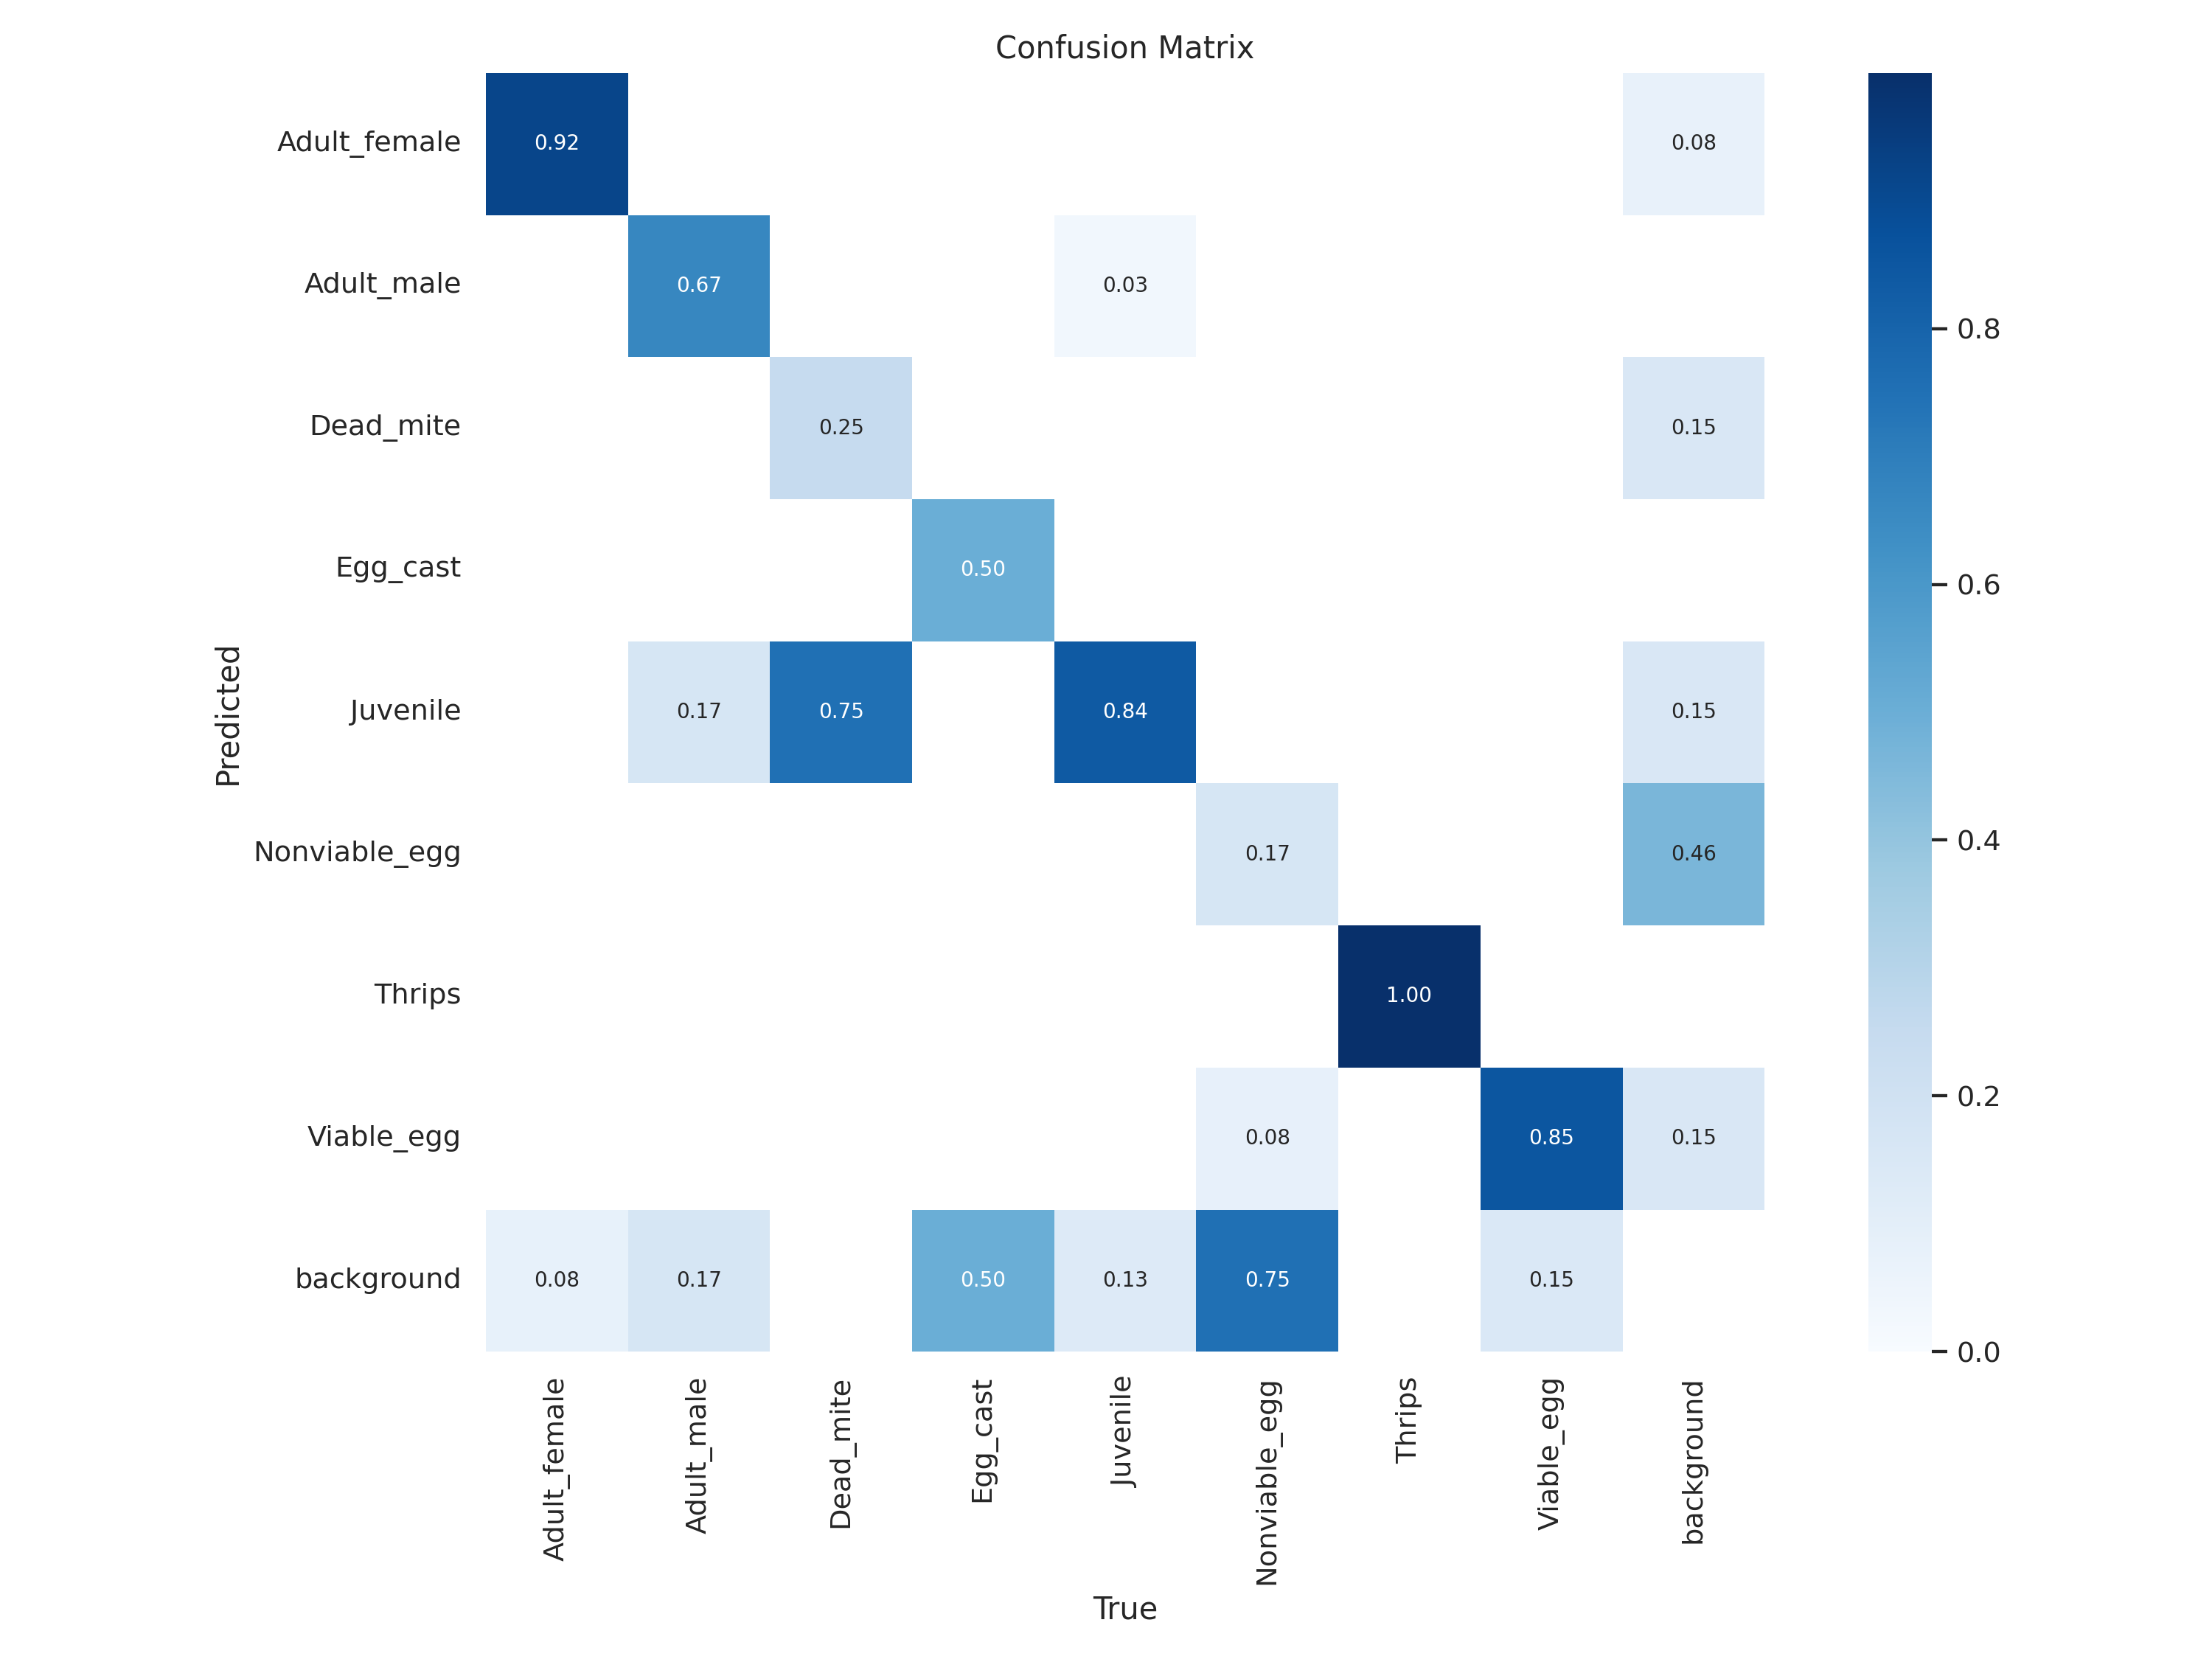

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content/drive/MyDrive/blackbird/mite_detection


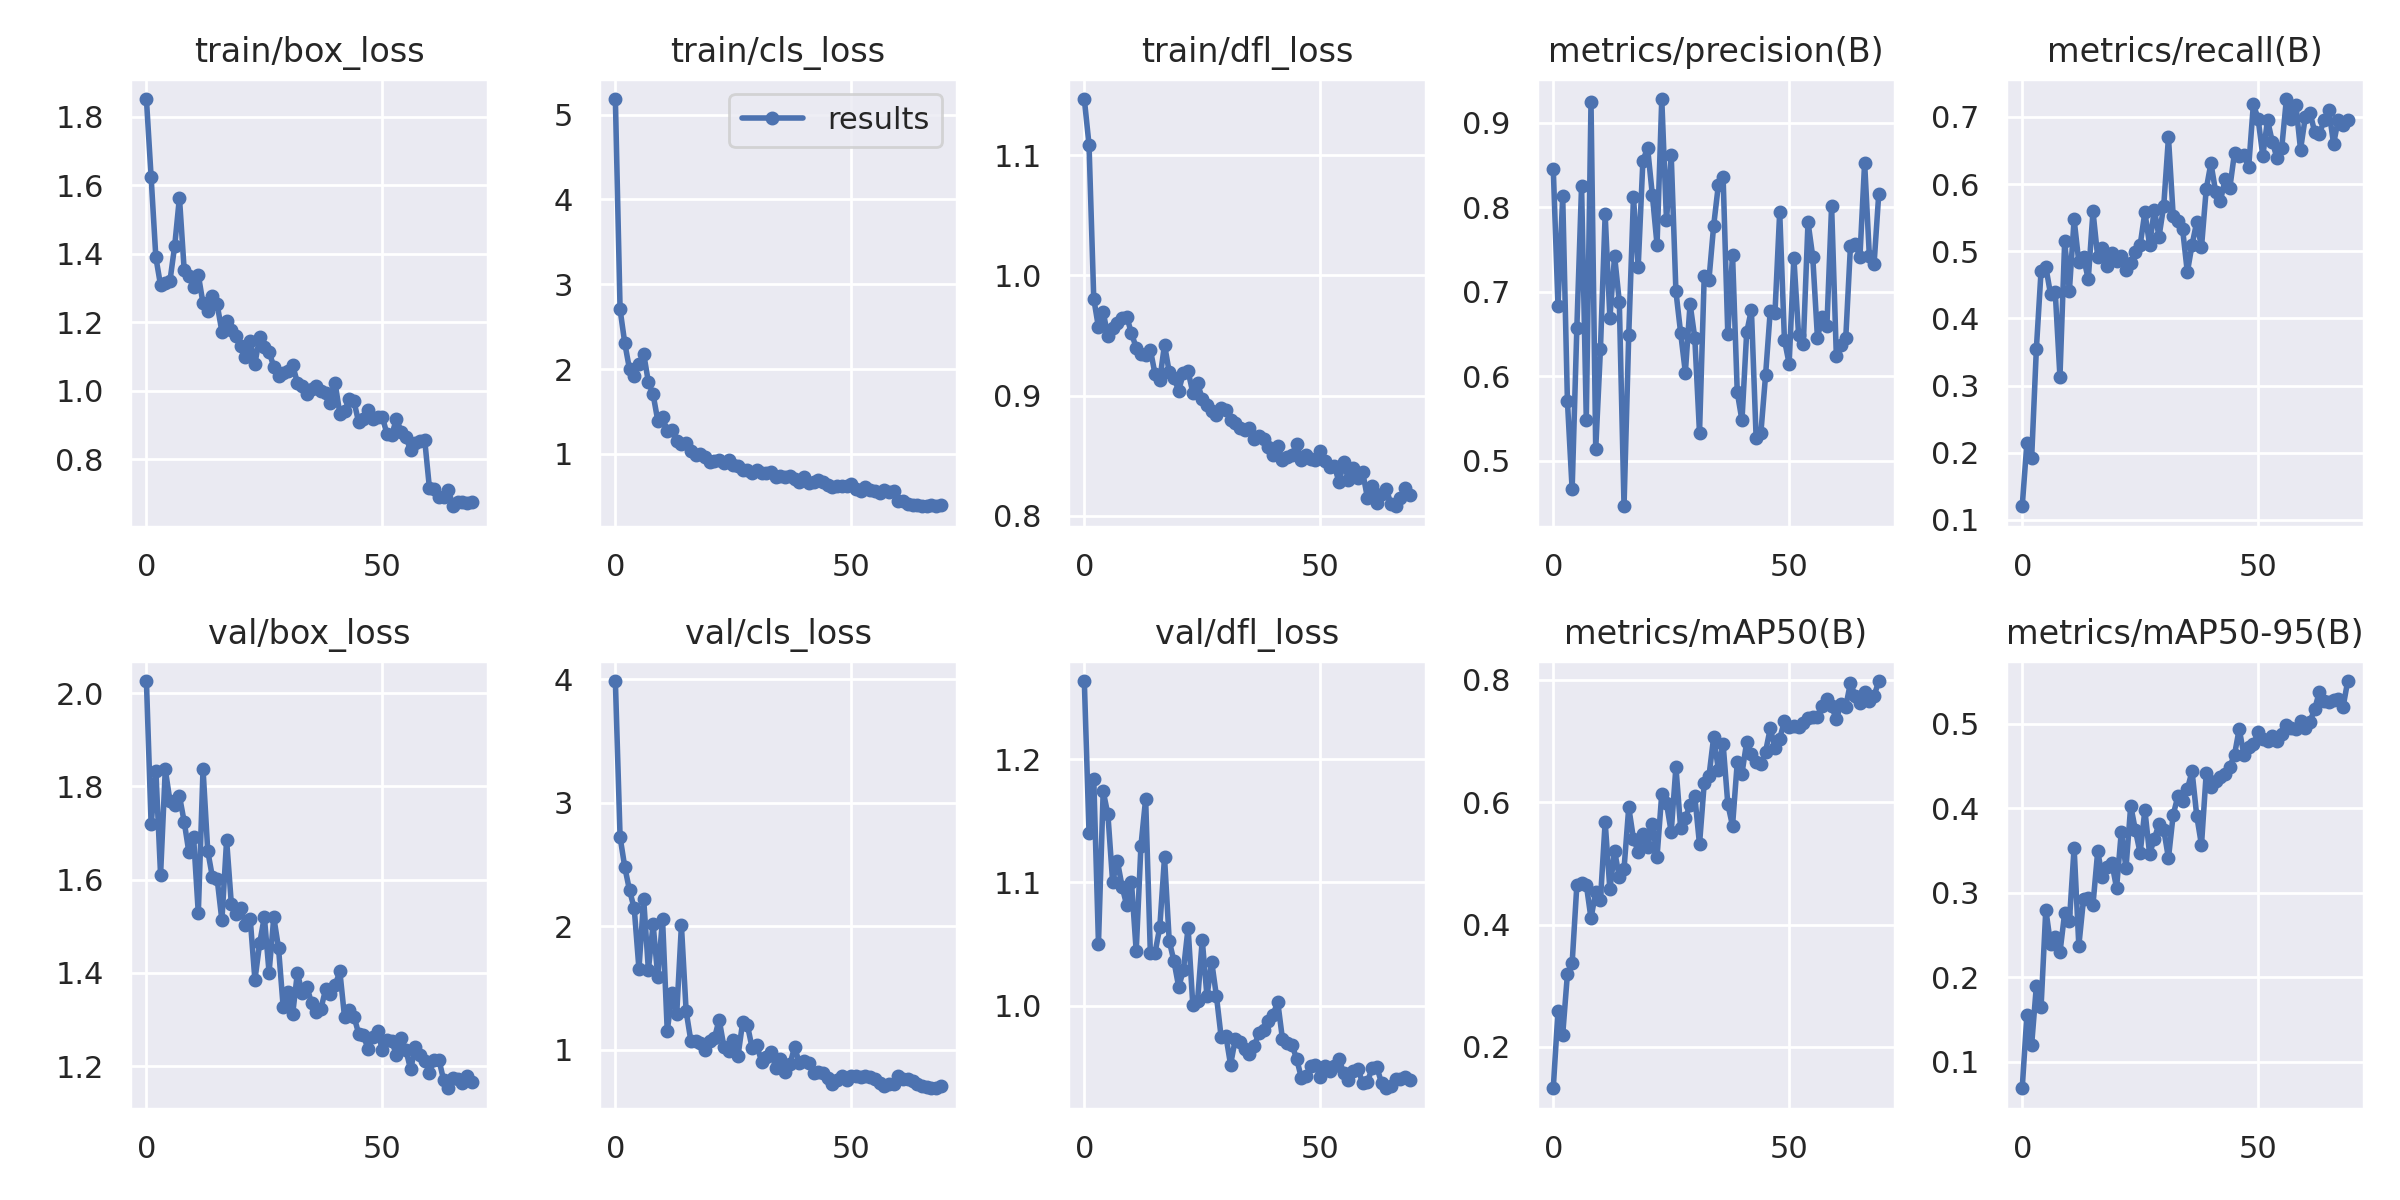

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content/drive/MyDrive/blackbird/mite_detection


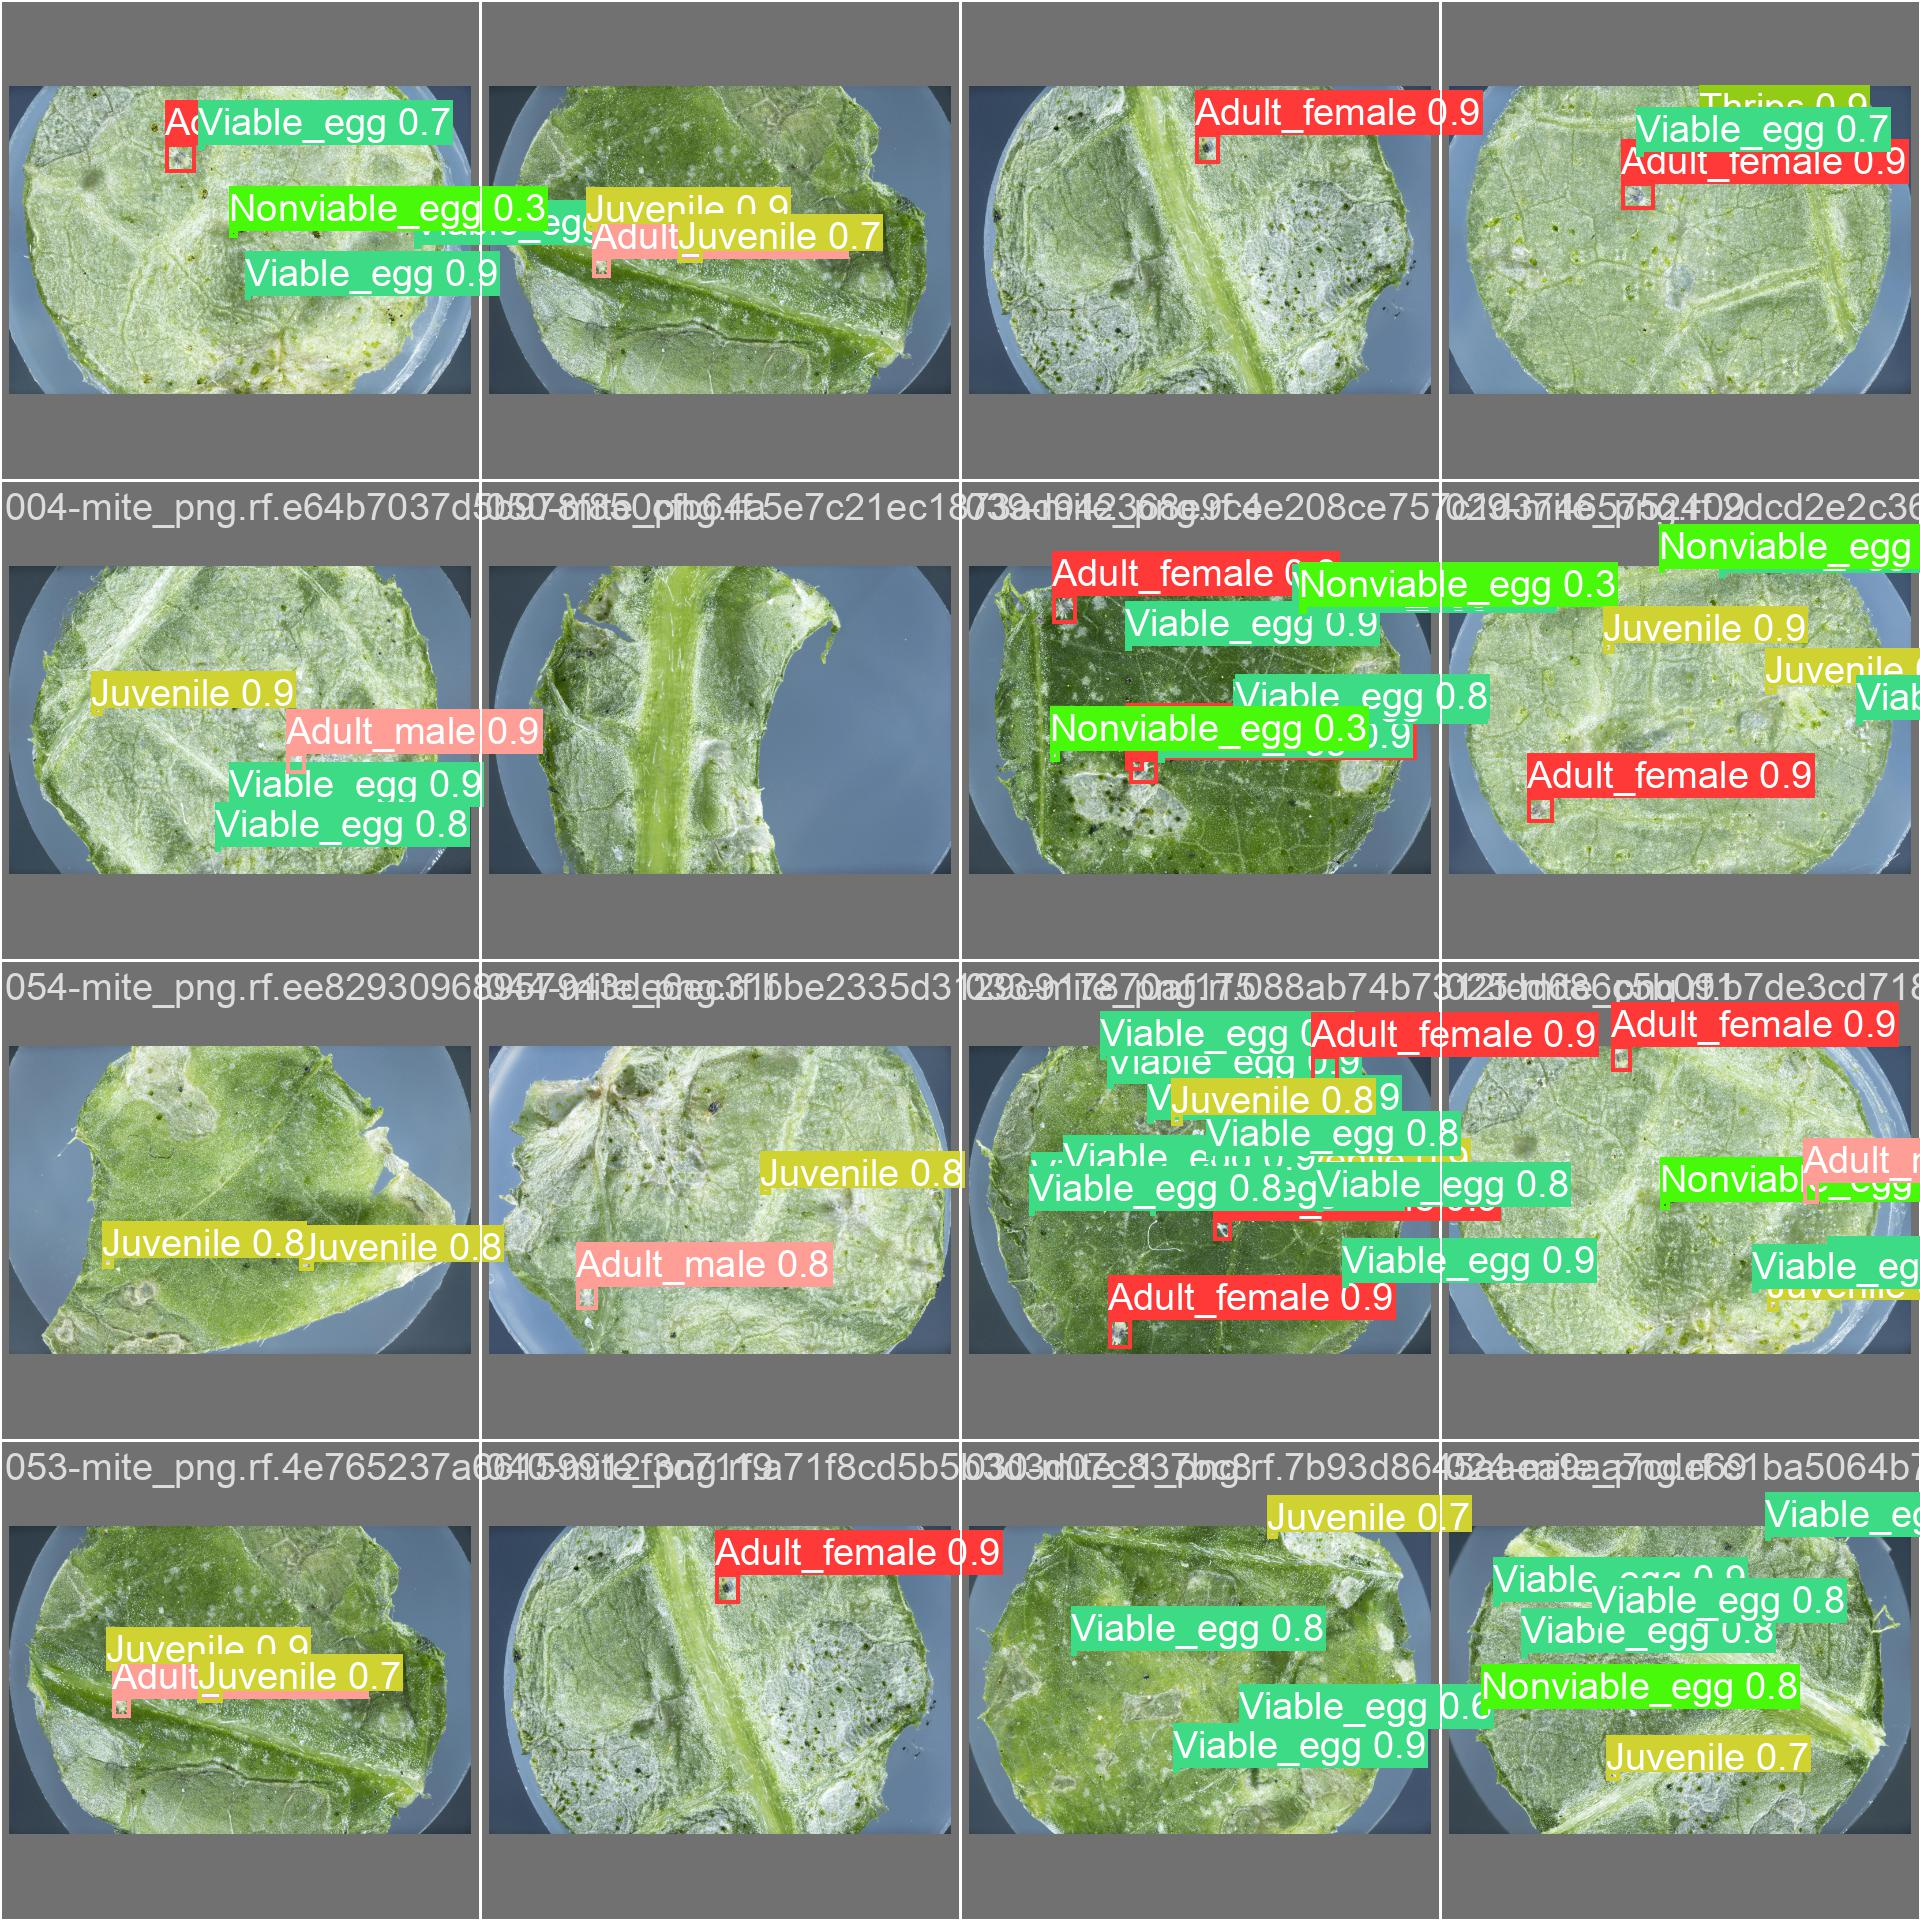

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/blackbird/mite_detection
2023-05-11 22:09:04.735963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68131272 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/drive/MyDrive/blackbird/mite_detection/datasets/TSSM-Detection-2/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:03<00:00,  1.76s/it]
                   all         27        176      0.803      0.679      0.785      0.545
          Adult_female         27         25      0.958      0.919      0.956      0.722
            Adult_male         27          6      0.794      0.647      0.816      0.637
             Dead_mite         27          4      0.576        0.5      0.705   

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/blackbird/mite_detection
2023-05-11 22:09:42.192208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68131272 parameters, 0 gradients, 257.4 GFLOPs
image 1/17 /content/drive/MyDrive/blackbird/mite_detection/datasets/TSSM-Detection-2/test/images/002-mite_png.rf.3d4312ca13c8dfab14b11db5ff1f97ba.jpg: 544x800 3 Adult_females, 1 Adult_male, 1 Juvenile, 3 Viable_eggs, 125.4ms
image 2/17 /content/drive/MyDrive/blackbird/mite_detection/datasets/TSSM-Detection-2/test/images/007-mite_png.rf.bad644ca6a59b6ab817d80c484d752f5.jpg: 544x800 1 Adult_female, 13.5ms
image 3/17 /content/drive/MyDrive/blackbird/mite_detection/datasets/TSSM-Detection-2/test/images/013-mite_png.rf.5afd9c38ef069e4e081201521334a0d3.jpg: 544x800 1 Dead_mite, 4 Viable_eggs, 13.5ms
image 4/17 /content/drive/MyDrive/blackbird/m

**NOTE:** Let's take a look at few results.

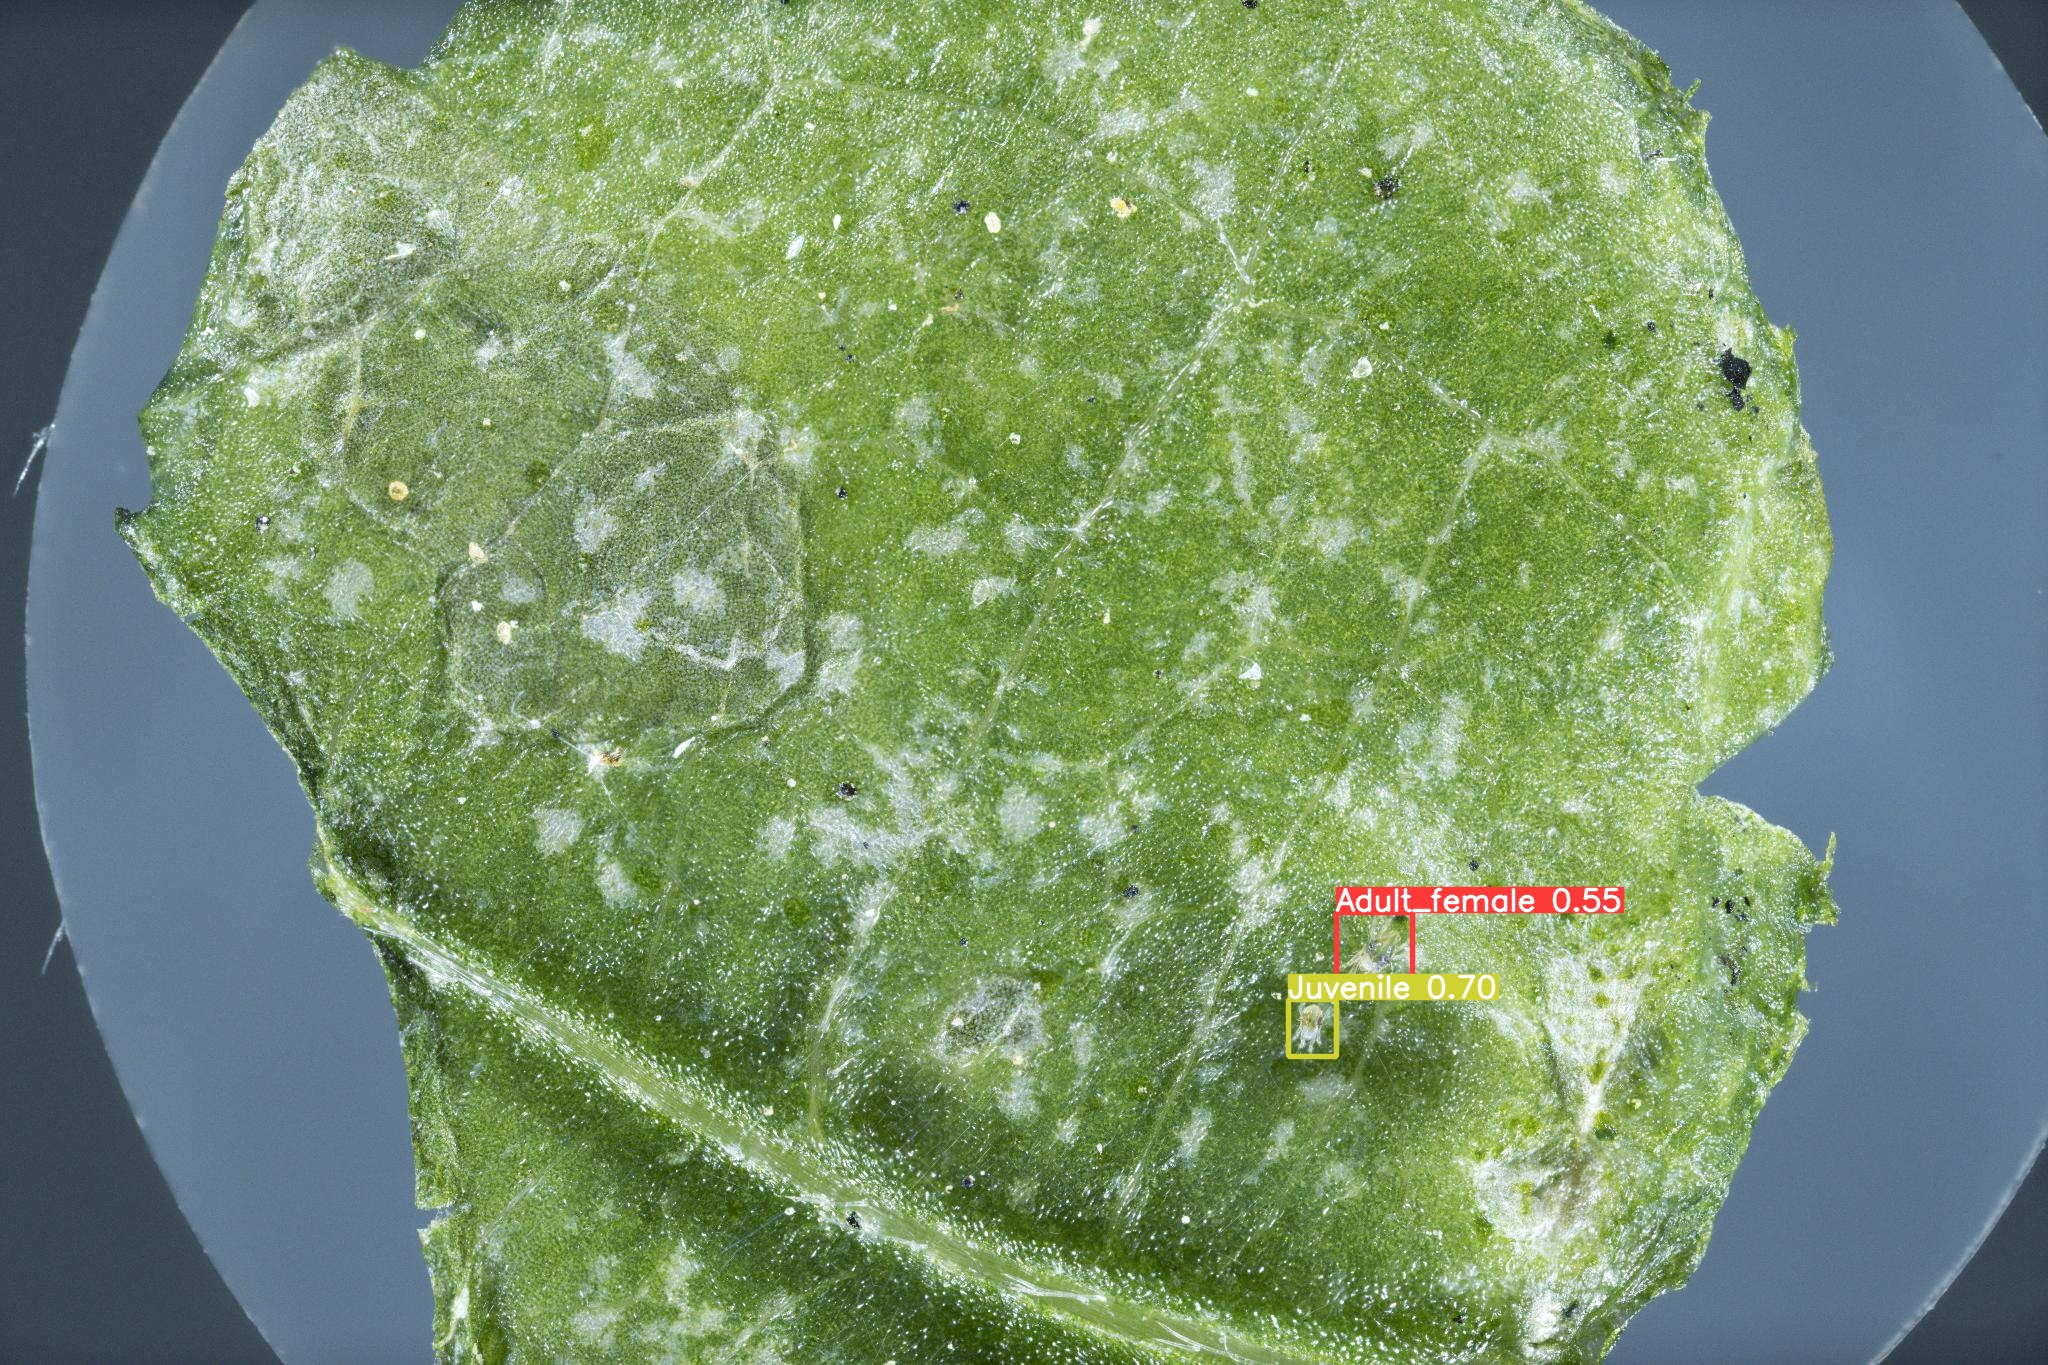

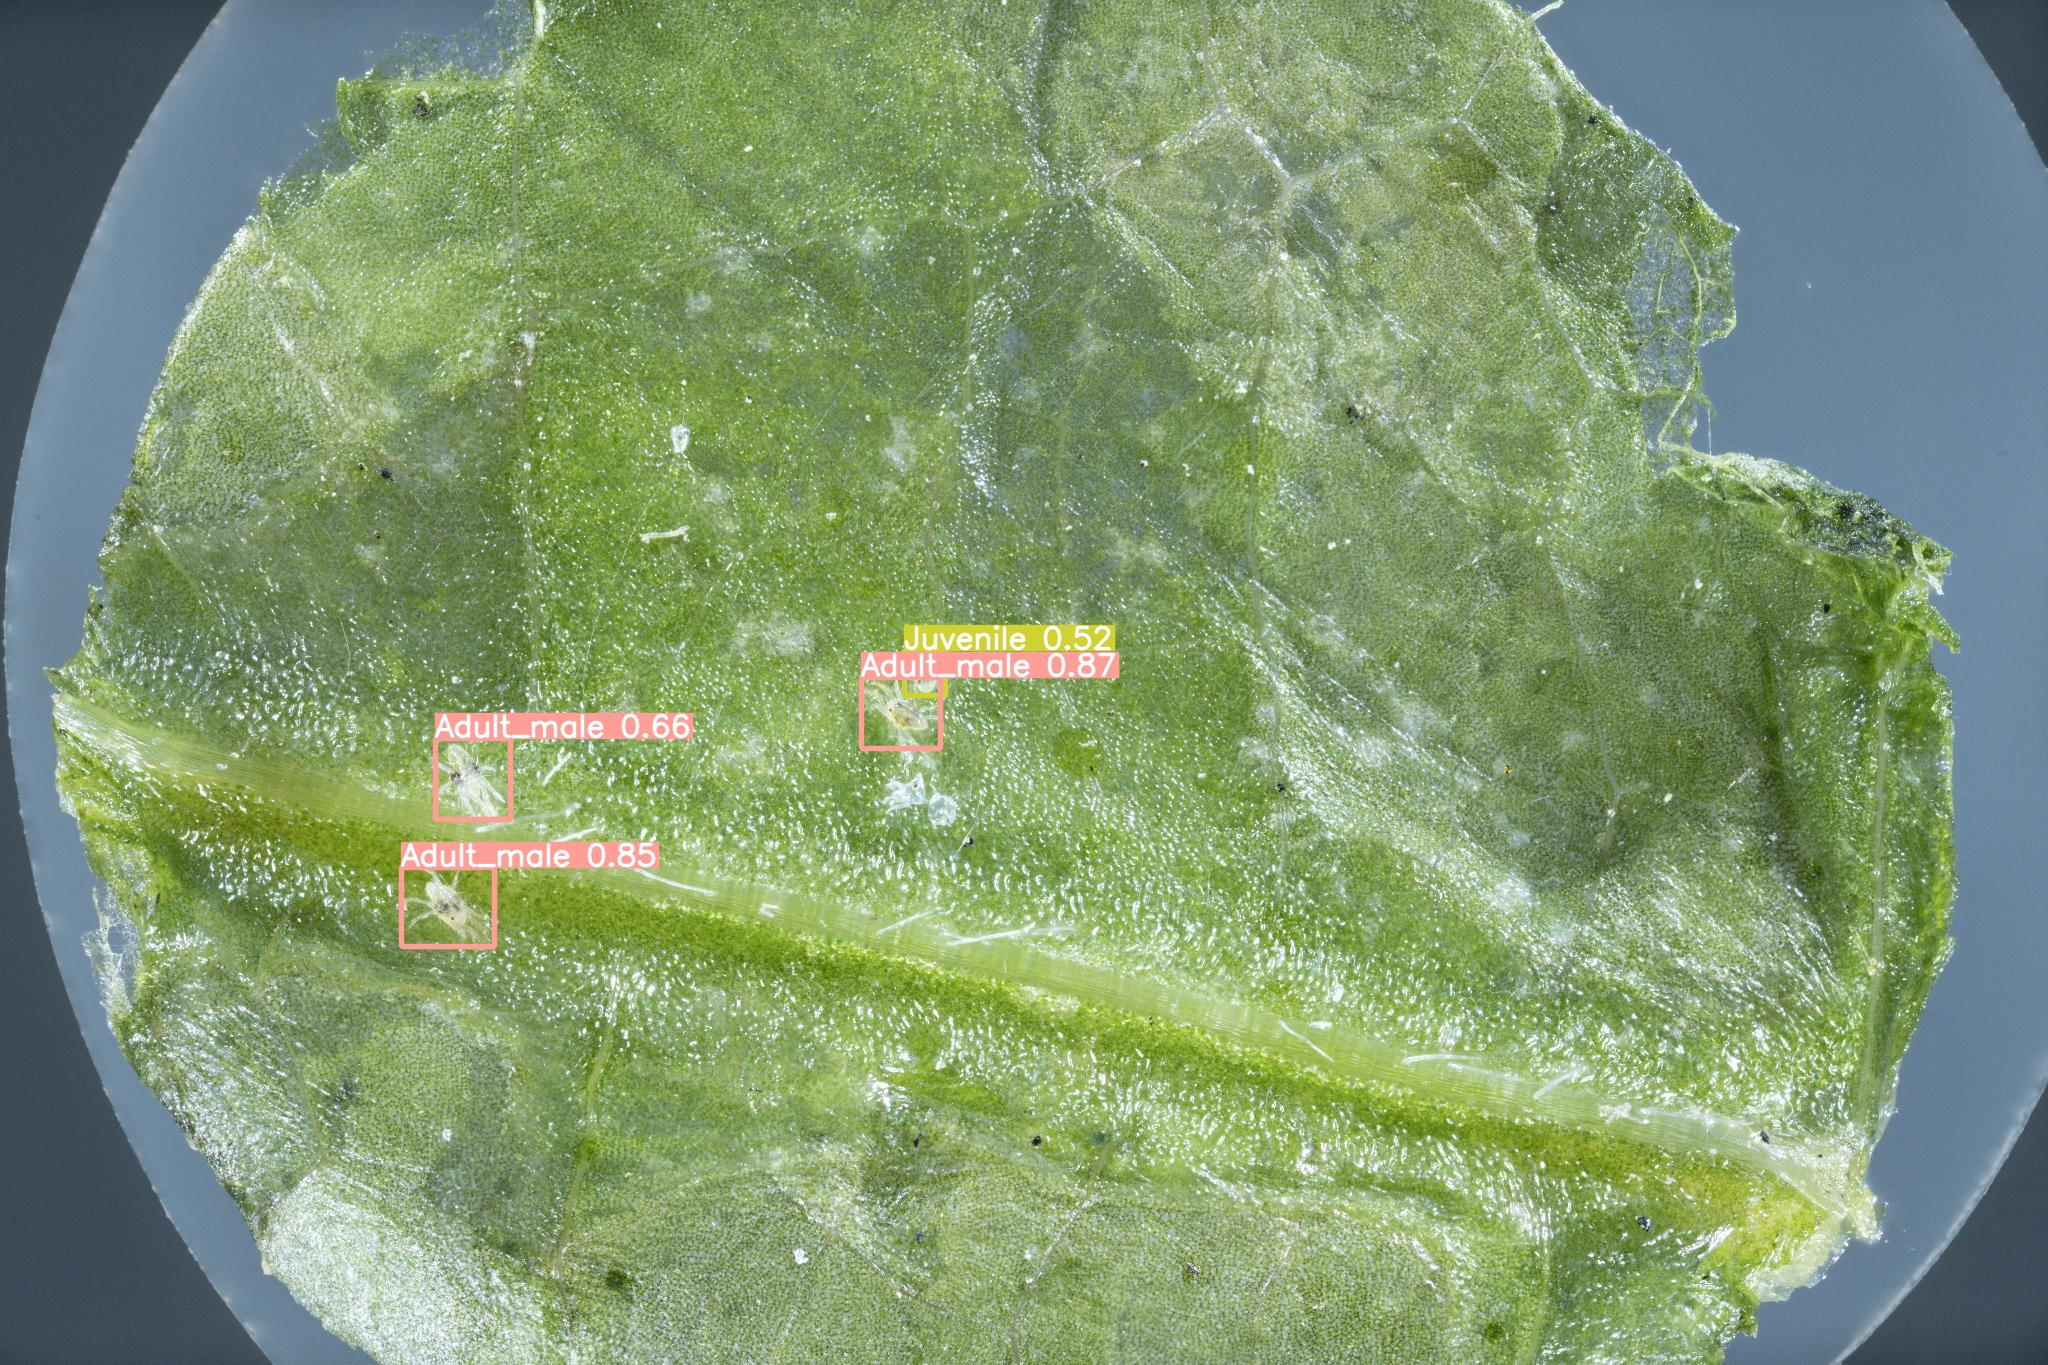

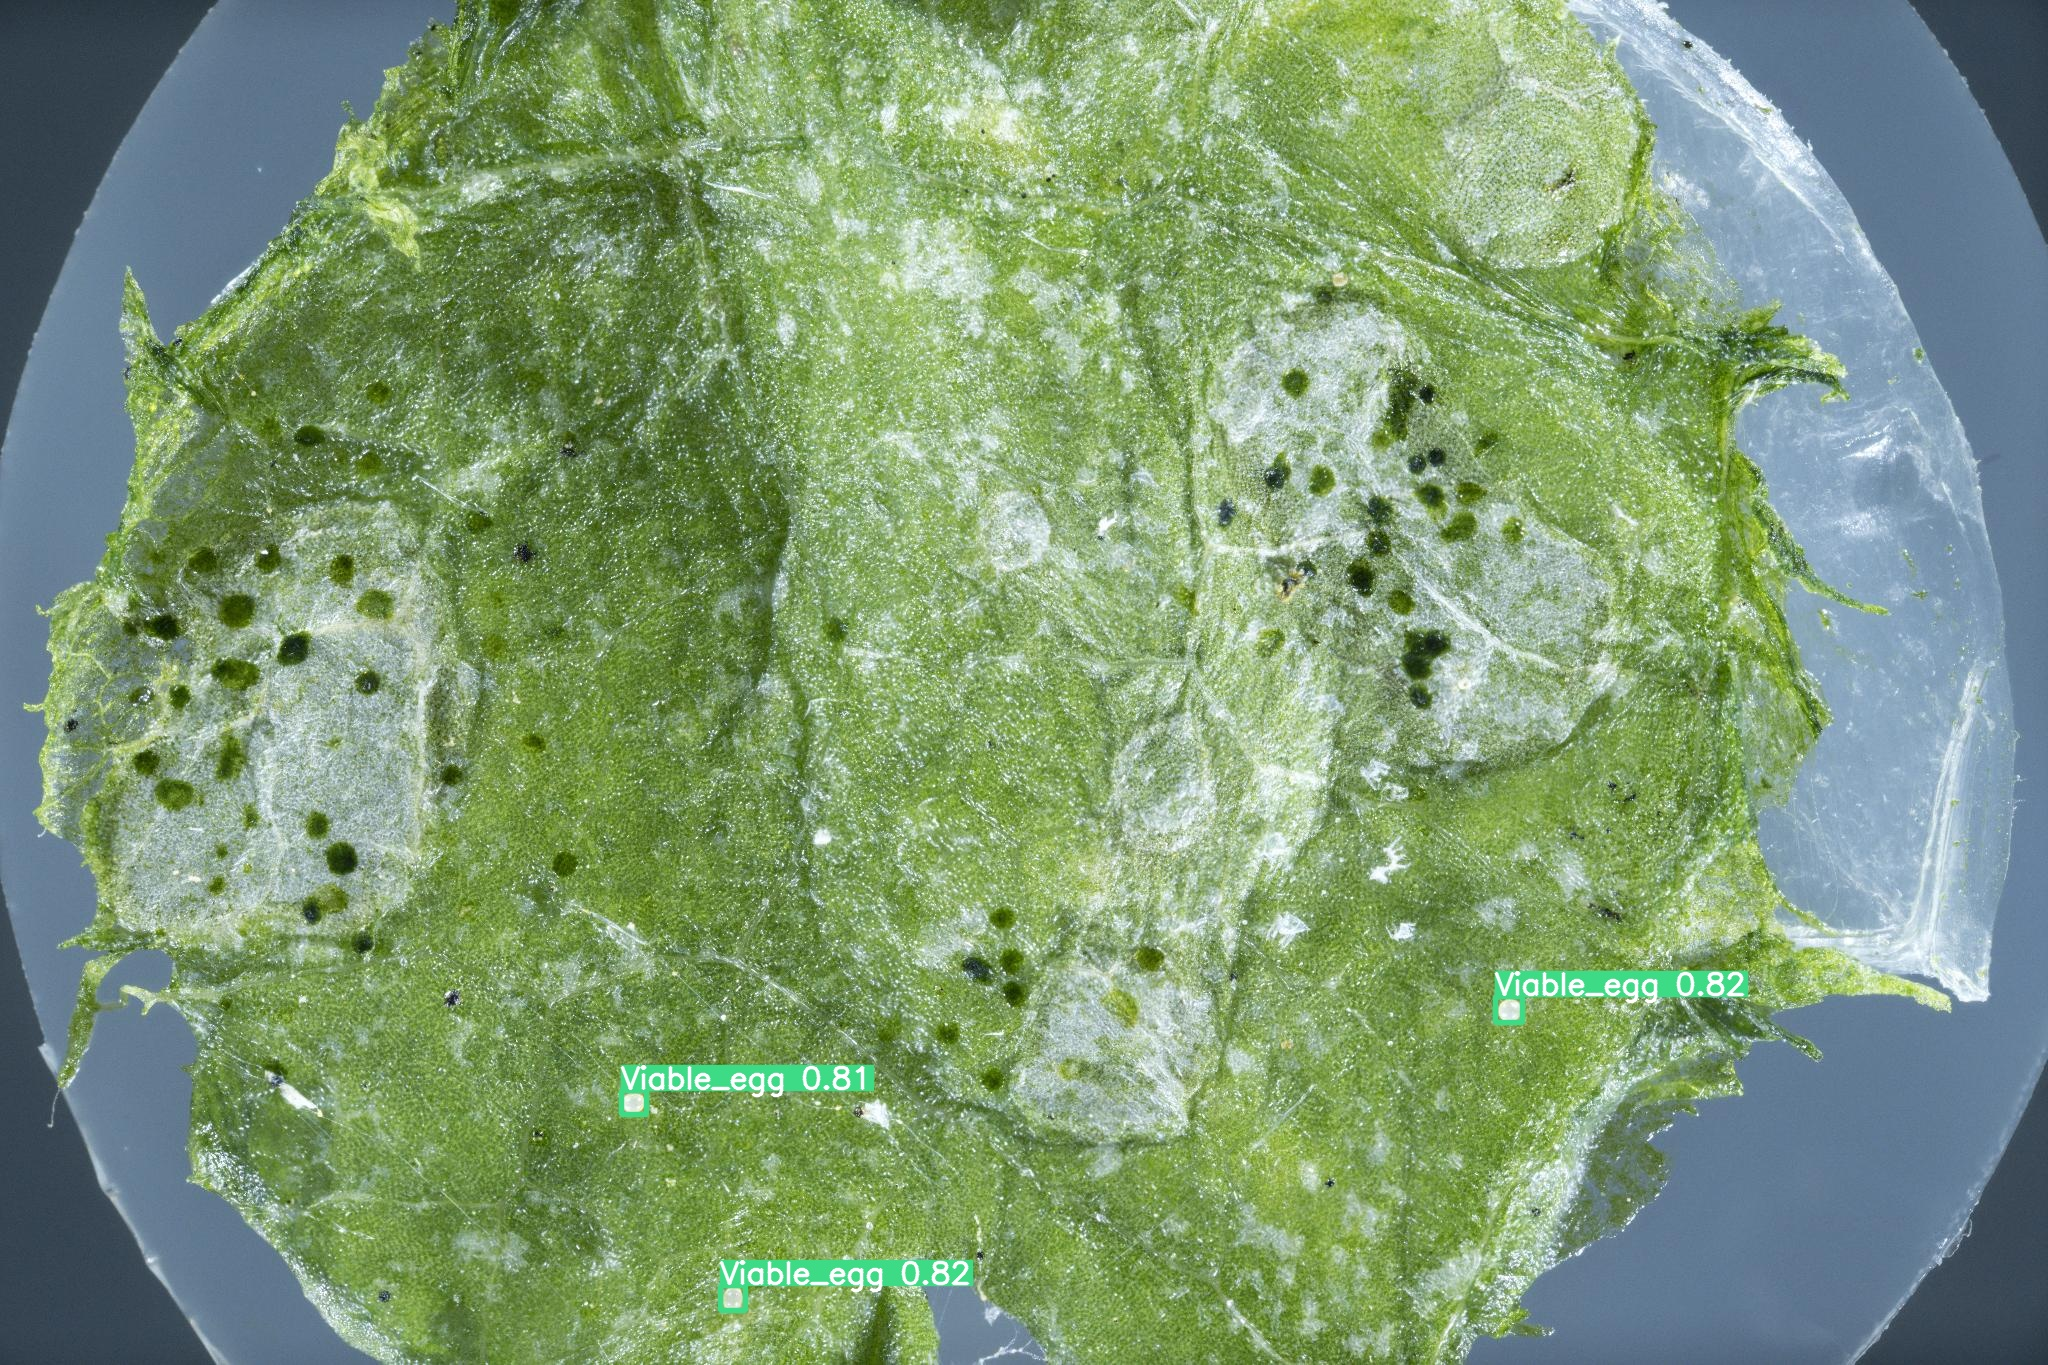

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[9:12]:
      display(Image(filename=image_path, width=600))
      print("\n")